In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys
sys.path.append('../../../code/')

import utils
import leakage
import reframed
import scipy

# Estimate release rates for C. glutamicum in glucose from Paczia et al. 2012

In [2]:
organism = 'c_glutamicum'
data_folder = Path('../../../data')
supp_figure_folder = Path('../../../SupplementalFigures')

exometabolites_folder = data_folder / 'paczia_2012' /f"{organism}"
fn_OD = exometabolites_folder / "{0}_OD.csv".format(organism)

In [3]:
gDW_per_OD = 0.27 # Use value from Zhang et al., 2017 (https://doi.org/10.1186/s13068-017-0856-3)

In [4]:
concentrations, concentrations_std = leakage.get_concentrations(exometabolites_folder, 'c_glutamicum')

In [5]:
df_OD = pd.read_csv(fn_OD, index_col=0)
df_OD.fillna(df_OD['OD std'].mean())

,OD mean,OD std
Time,,
0,0.291000,3.657989
11,2.460000,0.040000
12,3.366667,0.070946
13,4.123333,0.075719
14,5.316667,0.049329
15,8.813333,0.147422
16,14.000000,0.200000
17,15.866667,0.208167
18,19.533333,0.503322


(0.0, 30.0)

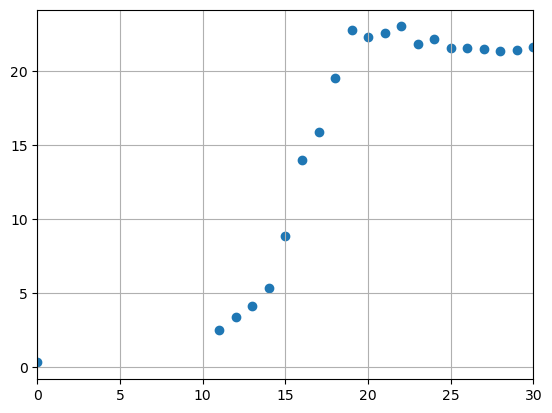

In [6]:
plt.scatter(df_OD.index, df_OD['OD mean'])
plt.grid()
plt.xlim(0,30)

In [7]:
fit = np.polyfit(df_OD.index[0:3], np.log(df_OD['OD mean'][0:3]), 1)

In [8]:
xarr = np.arange(0, 20, 0.1)
y0 = df_OD['OD mean'][0]
y = y0*np.exp(xarr*fit[0])

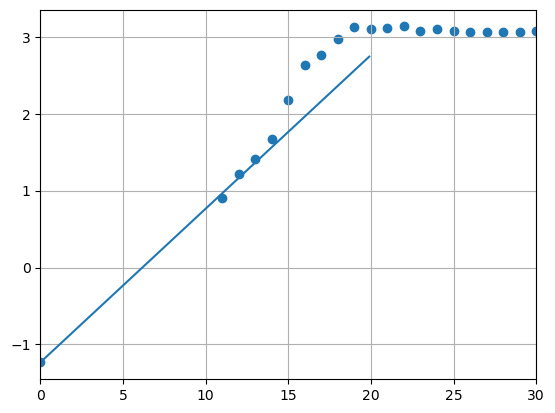

In [9]:
plt.scatter(df_OD.index, np.log(df_OD['OD mean']))
plt.grid()
plt.xlim(0,30)
plt.plot(xarr, np.log(y))

In [10]:
fit_exp = np.polyfit(df_OD.index[1:10], np.log(df_OD['OD mean'][1:10]), 1)
fit_exp

array([ 0.29730784, -2.3620002 ])

## Calculate integrated OD from 0 to 11 analytically from growth rate

In [11]:
int_0_to_11 = (y0/fit[0])*(np.exp(11*fit[0])-1)

In [12]:
int_0_to_11

np.float64(11.668163886929982)

In [13]:
df_OD['OD mean'].values[1:3]

array([2.46      , 3.36666667])

In [14]:
xt = np.zeros(len(df_OD)-1)
for i in range(1, len(df_OD)-1):
    xt[i] = scipy.integrate.simpson(df_OD['OD mean'].values[1:i+1], x = df_OD.index[1:i+1])
    # xt[i] = np.trapz(df_OD.loc[:i, 'OD mean'], dx=1)
    print(i,df_OD.index[i], df_OD['OD mean'].iloc[i], xt[i]*gDW_per_OD)#
xt[1:] += int_0_to_11 # I do this because the simpson integration from 0 to 11 is overestimating the biomass
x = xt*gDW_per_OD

1 11 2.46 0.0
2 12 3.366666667 0.786600000045
3 13 4.123333333 1.8045000000900002
4 14 5.316666667 3.0690750000600002
5 15 8.813333333 4.882800000149999
6 16 14.0 7.9245750000825
7 17 15.86666667 12.14400000042
8 18 19.53333333 16.882500000645
9 19 22.76666667 22.652999999819997
10 20 22.26666667 28.816500000869997
11 21 22.56666667 34.74900000162
12 22 23.0 40.897500002145
13 23 21.8 47.02200000192
14 24 22.13333333 52.918500001545
15 25 21.56666667 58.89300000101999
16 26 21.53333333 64.69950000132
17 27 21.5 70.52100000012
18 28 21.36666667 76.31025000057
19 29 21.43333333 82.07700000102
20 30 21.6 87.884250000345
21 31 21.1 93.68100000072
22 32 21.6 99.42300000072001
23 34 20.33333333 110.92050000004501
24 36 19.7 121.700999998845
25 38 19.33333333 132.24449999884501
26 40 19.56666667 142.720499998395
27 42 19.5 153.322500000645
28 44 20.3 164.029500000495
29 46 20.46666667 175.132500001245
30 48 20.43333333 186.184500001695
31 50 20.03333333 197.134499998845
32 52 20.3 207.9944999

# Estimate max glucose uptake rate


In [15]:
fn_glucose = exometabolites_folder / "{0}_glucose.csv".format(organism)

df_glucose = pd.read_csv(fn_glucose, index_col=0)
# df_glucose.loc[0,:]=[20,0] # From paper (in g/L)

In [16]:
# cum_OD = np.zeros(53)*np.nan
OD_values = df_OD['OD mean'].values
timepoints = df_OD.index


In [17]:
mu = (np.log(OD_values)[9]-np.log(OD_values)[1])/(timepoints[9]-timepoints[1])

In [18]:
growth_fun = lambda t: OD_values[1]*np.exp(mu*(t-11))

In [19]:

df_glucose['Glucose mM'] = df_glucose['Glucose mean']/180.18*1000

(0.0, 150.0)

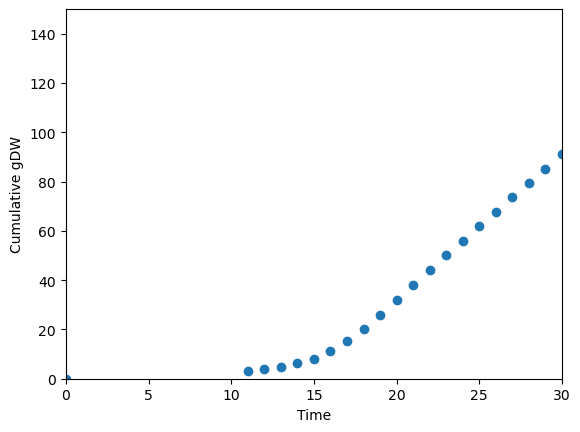

In [20]:
plt.scatter(df_OD.index[:-1], x)
plt.xlabel('Time')
plt.ylabel('Cumulative gDW')
plt.xlim(0, 30)
plt.ylim(0,150)

(0.0, 150.0)

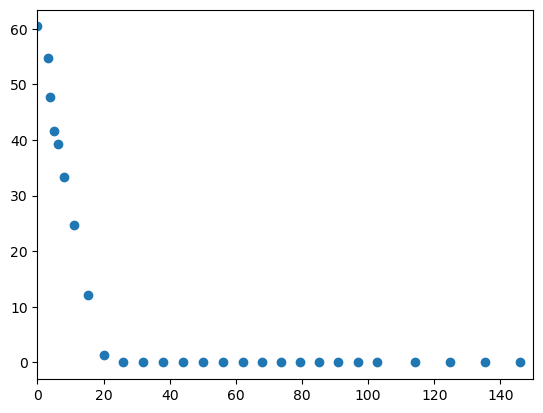

In [21]:
plt.scatter(x, df_glucose['Glucose mM'].values[:-1])
plt.xlim(0, 150)

In [22]:
glucose_fit = np.polyfit(x[:9], df_glucose['Glucose mM'][:9], 1)
glucose_uptake = glucose_fit[0]

## Mapping

In [23]:
mapping_df = pd.read_csv(data_folder / 'this_project/5_div/5B_id_mapping.csv', index_col=0)
# mapping_df.index = [x.strip('\t').replace(" MS", "") for x in mapping_df.index]
met_abrv_to_id = mapping_df['Cglutamicum metabolite'].to_dict()
met_abrv_to_name = mapping_df['Metabolite name'].to_dict()
met_name_to_abrv = {value:key for key, value in met_abrv_to_name.items()}


# Estimate rates

In [24]:
specific_limits = {
'G6P': (1,18),
'F6P': (1,18),
'FBP': (1,18),
'DHAP': (1,18),
'GA3P': (1,18),
'23PG': (1,18),
'R5P': (1,18),
'RU5P+X5P': (1,18),
'S7P': (1,18),
'E4P': (1,18),
'ASN': (1,18),
'GLU': (1,17),
'SER': (1,17),
'THR': (1,17),
'GLN': (1,17),
'HOM': (1,17),
'TYR': (1,17),
'GLY': (1,18),
'PRO': (1,17),
'ALA': (1,17),
'MET': (1,17),
'VAL': (1,17),
'ARG': (1,17),
'LYS': (1,18)}

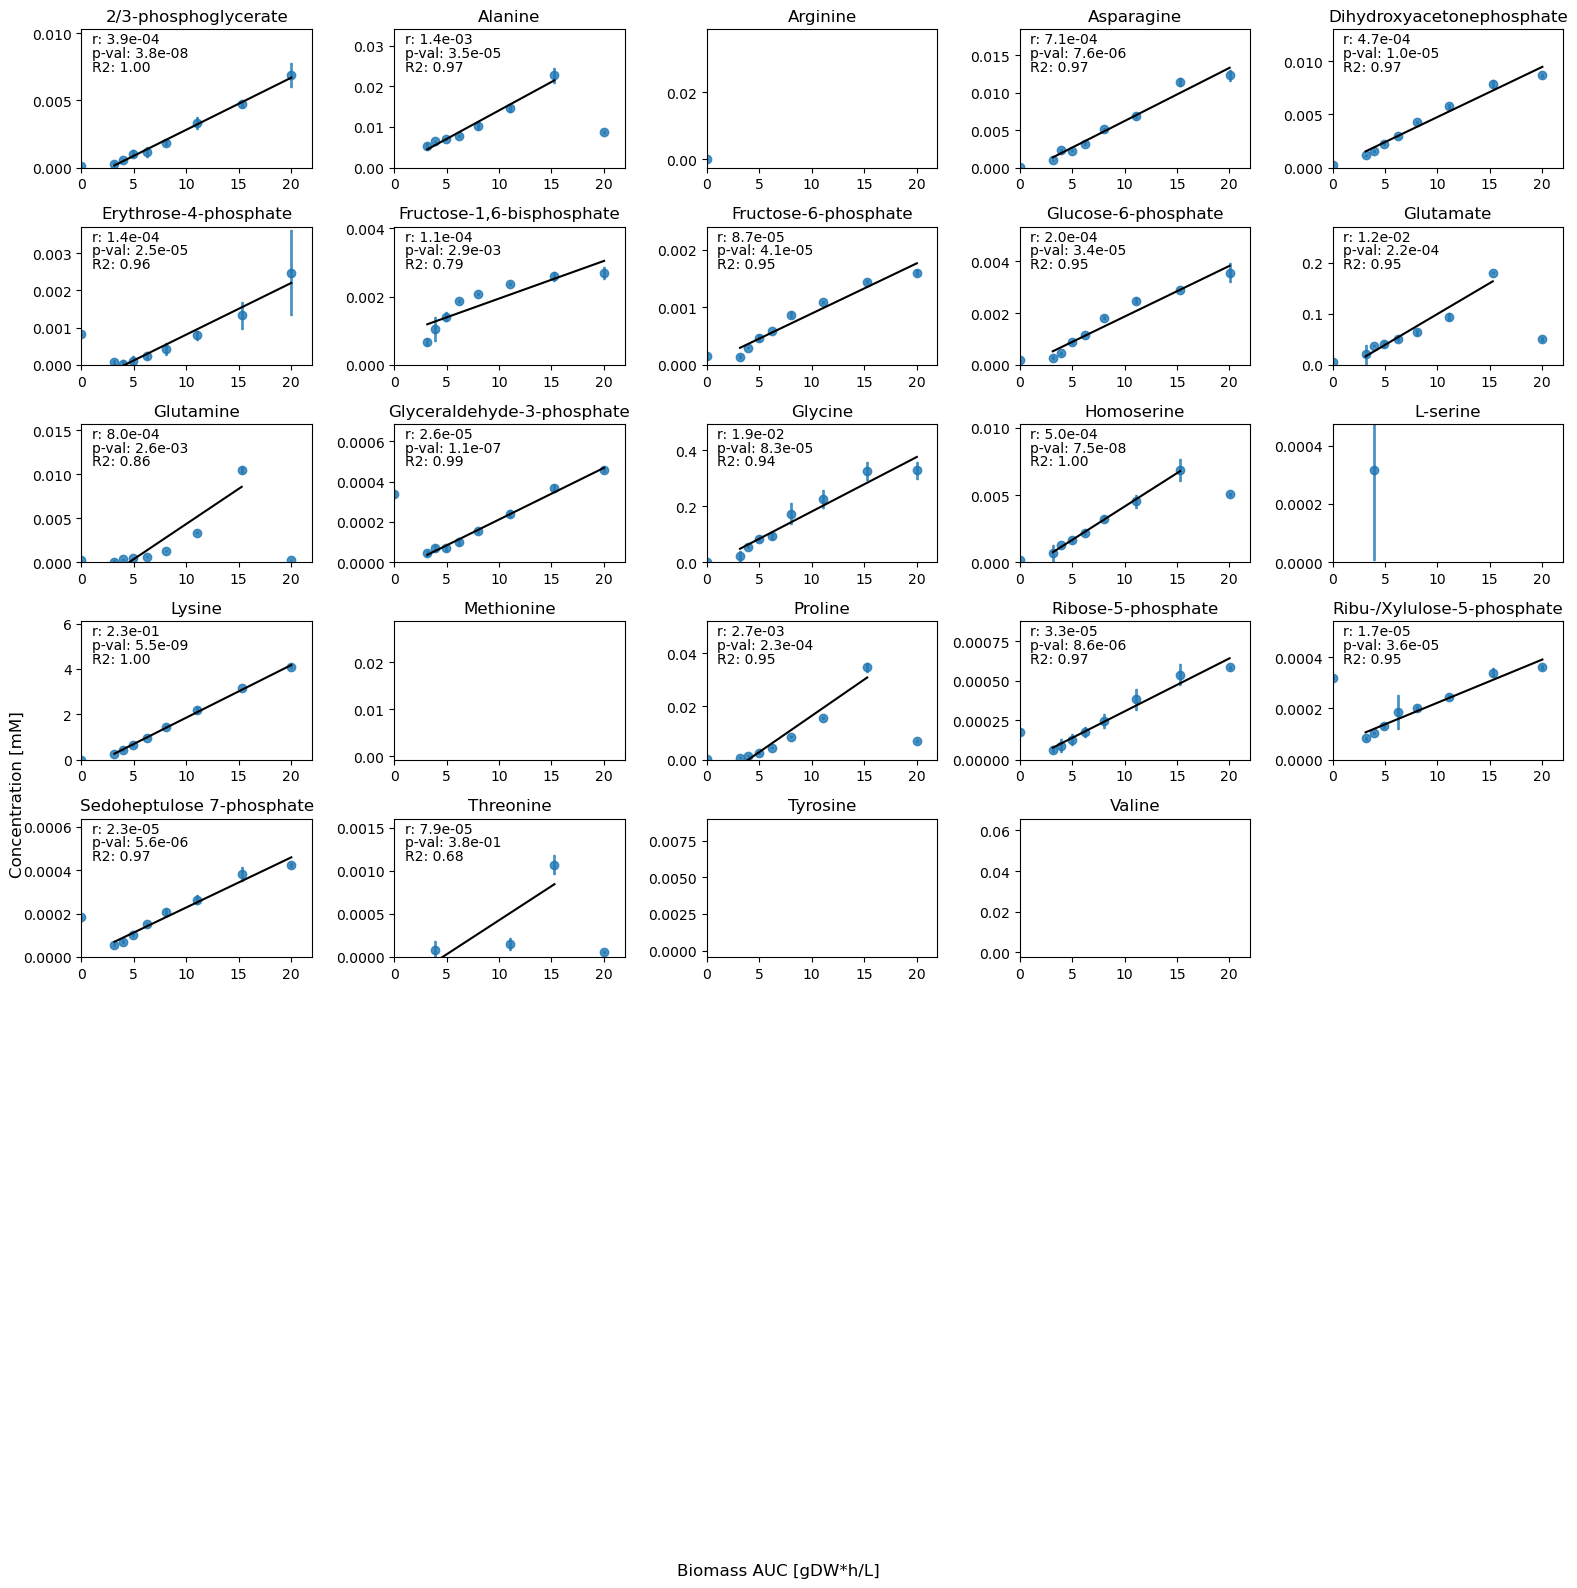

In [25]:
rate_dict_m = {}
fig, axes = plt.subplots(8,5, figsize = (16, 16), sharex = False)
axes = axes.flatten()
fun = lambda x, a ,b: x*a+b
data_list = []
metabolite_names = sorted([met_abrv_to_name[c] for c in concentrations.columns])
for i,metabolite in enumerate(metabolite_names):
    c = met_name_to_abrv[metabolite]
    conc = concentrations[c][:-1]*1e-3 # Convert from uM to mM #
    conc_std = concentrations_std[c][:-1]*1e-3
    lim = specific_limits[c]
    conc[conc==0] = np.nan
    idx = ((concentrations.index >= lim[0]) & (concentrations.index <= lim[1]))[:-1]
    nan_idx = ~np.isnan(conc)

    idx = idx & nan_idx
    rate_conc = conc[idx]

    ax = axes[i]
    ax.errorbar(x, conc, yerr = conc_std, fmt='o',color='C0',capthick=1,elinewidth=2,capsize=1, zorder = 0, alpha= 0.8)

    if len(rate_conc) >= 3:
        # conc[conc==0] = np.nan
        res = scipy.stats.linregress(x[idx], conc[idx])
        # print(f"R-squared: {res.rvalue**2:.6f}")
        r2 = res.rvalue**2
        data = [res.slope, res.stderr,res.pvalue, c, res.pvalue < 0.05, r2]
        x_fit = np.linspace(x[idx].min(), x[idx].max(), 3)
        y_fit = fun(x_fit, res.slope, res.intercept)
    
        if r2 > 0.5:
            ax.plot(x_fit, y_fit, 'k')
        else:
            ax.plot(x_fit, y_fit, 'r')
    else:
        data = [np.nan, np.nan, np.nan, c, np.nan, np.nan]
    
    data_list.append(data)
            

        
    ax.set_title(metabolite)
    ax.set_xlim(0, 22)
    
    y_max = np.max(conc[idx])*1.5
    if np.isfinite(y_max):
        ax.set_ylim(0, y_max)
    if len(rate_conc) >= 3:
        ax.annotate(f'r: {res.slope:.1e}', (1, y_max*0.9))
        ax.annotate(f'p-val: {res.pvalue:.1e}', (1, y_max*0.8))
        ax.annotate(f'R2: {r2:.2f}', (1, y_max*0.7))

    i +=1
    # print(i)

while i<(8*5):
    axes[i].set_visible(False)
    i+=1

fig.supxlabel('Biomass AUC [gDW*h/L]')
fig.supylabel('Concentration [mM]')

plt.tight_layout()
plt.savefig(supp_figure_folder / 'cglutamicum_paczia_12_fitted_rates_manual_limits.png', dpi = 400)
plt.savefig(supp_figure_folder / 'cglutamicum_paczia_12_fitted_rates_manual_limits.pdf')

plt.show()

In [26]:
rate_data = pd.DataFrame(data_list, columns = ['Rate [mmol/gDW/h]', 'Std. Err [mmol/gDW/h]', 'p-val', 'Metabolite abbrv.', 'Significance', 'R2'])

# Get model

In [27]:
model_ez = reframed.load_cbmodel('../../../models/c_glutamicum/smoment_iCW773.xml')
model_ez.solver = 'gurobi'


In [28]:
solution = reframed.FBA(model_ez, constraints={'R_EX_glc_e': (glucose_uptake,0)})
solution.show_values('EX')

Set parameter Username
Set parameter LicenseID to value 2586336
Academic license - for non-commercial use only - expires 2025-11-18
R_EX_ca2_e   -0.00952816
R_EX_co2_e    6.51975
R_EX_cobalt2_e -4.60592e-05
R_EX_cu2_e   -0.0012974
R_EX_fe2_e   -0.0265832
R_EX_glc_e   -3.03412
R_EX_h_e      2.17665
R_EX_h2o_e    12.6956
R_EX_k_e     -0.357303
R_EX_mg2_e   -0.0158801
R_EX_mn2_e   -0.00126565
R_EX_nh4_e   -2.44155
R_EX_ni2_e   -0.000590748
R_EX_o2_e    -5.70462
R_EX_pi_e    -0.140169
R_EX_so4_e   -0.0452297
R_EX_xan_e    0.0452694
R_EX_zn2_e   -0.000624082
R_EX_biomass  0.282095
R_EX_BIOTIN  -6.70334e-07
R_EX_cl      -0.00952816


In [29]:
measured_metabolites = []
for bigg_id in met_abrv_to_id.values():
    if not isinstance(bigg_id, str):
        continue
    m_ids = bigg_id.split(', ')
    for m_id in m_ids:
        if f'M_{m_id}_c' in model_ez.metabolites:
            measured_metabolites.append(f'M_{m_id}_c')

# Shadow prices

In [30]:
shadow_prices = leakage.estimate_shadow_prices_reframed(model_ez, constraints={'R_EX_glc_e': (glucose_uptake,0)}, metabolites = measured_metabolites)

In [31]:
glc_uptake_range = np.linspace(glucose_uptake*1.2, glucose_uptake*0.8, 5, endpoint=True)
shadow_price_list = []
for g in glc_uptake_range:
    shadow_prices_i = leakage.estimate_shadow_prices_reframed(model_ez, constraints={'R_EX_glc_e': (g,0)}, metabolites = measured_metabolites)
    shadow_price_list.append(shadow_prices_i)
shadow_price_list.append(shadow_prices)

In [32]:
df_sp_var = pd.DataFrame(shadow_price_list)

# Turnover

In [33]:
solution = reframed.pFBA(model_ez, constraints={'R_EX_glc_e': (glucose_uptake,0)})
turnover = solution.get_metabolites_turnover(model_ez)

    

# Make spreadsheet

In [34]:
data = []
drop_mets = ['ru5p__L','xu5p__L'] # The D-forms is used in the pentose phosphate pathway, so we assume that it is primarily the D-forms
# 'Std. Err [mmol/gDW/h]', 'T-score', 'degrees of freedom', 'p-val', 'Metabolite abbrv.', 'Significance']
for _, row in rate_data.iterrows():
    if np.isnan(row['Rate [mmol/gDW/h]']):
        continue
    abbr = row['Metabolite abbrv.']
    rate = row['Rate [mmol/gDW/h]']
    bigg_ids = [x.strip() for x in met_abrv_to_id[abbr].split(',') if not x.strip() in drop_mets]
    if len(bigg_ids)>1:
        print(bigg_ids)
    rate_i = rate/len(bigg_ids)
    std_err_i = row['Std. Err [mmol/gDW/h]']/np.sqrt(len(bigg_ids))
    for bigg_id in bigg_ids:
        name =met_abrv_to_name[abbr]
        m_id = f'M_{bigg_id}_c'
        mv = -shadow_prices[m_id]
        m = model_ez.metabolites[m_id]
        element_dict = utils.get_element_dict(m)
        Nc = element_dict['C']
        mass = utils.get_mol_weight(m)
        mv_min = -df_sp_var.max()[m_id]
        mv_max = -df_sp_var.min()[m_id]
        
        data.append([abbr, bigg_id, name, mv, mv_min, mv_max, turnover[m_id], Nc, mass, rate_i, std_err_i, row['R2']])
df_rate = pd.DataFrame(data, columns = ['Metabolite abbrv.', 'Model ID', 'Metabolite', 
                                        'Metabolite value [gDW/mmol]','MV min', 'MV max', 
                                        'Turnover [mmol/gDW/h]', 'N carbons', 
                                        'Mol weight [g/mol]', 'Rate [mmol/gDW/h]', 'Std. Err [mmol/gDW/h]', 'R2'])

['2pg', '3pg']
['ru5p__D', 'xu5p__D']


In [35]:
for idx, row in df_rate.iterrows():
    if row['Model ID'] == '2pg':
        print(df_rate.loc[idx, 'Metabolite'], f'Changed {idx} to 2-phosphoglycerate')
        df_rate.loc[idx, 'Metabolite'] = '2-phosphoglycerate'
        
    if row['Model ID'] == '3pg':
        print(df_rate.loc[idx, 'Metabolite'], f'Changed {idx} to 3-phosphoglycerate')
        df_rate.loc[idx, 'Metabolite'] = '3-phosphoglycerate'

    if row['Model ID'] == 'ru5p__D':
        print(df_rate.loc[idx, 'Metabolite'], f'Changed {idx} to Ribulose-5-phosphate')
        df_rate.loc[idx, 'Metabolite'] = 'Ribulose-5-phosphate'
        
    if row['Model ID'] == 'xu5p__D':
        print(df_rate.loc[idx, 'Metabolite'], f'Changed {idx} to Xylulose-5-phosphate')
        df_rate.loc[idx, 'Metabolite'] = 'Xylulose-5-phosphate'



2/3-phosphoglycerate Changed 0 to 2-phosphoglycerate
2/3-phosphoglycerate Changed 1 to 3-phosphoglycerate
Ribu-/Xylulose-5-phosphate Changed 17 to Ribulose-5-phosphate
Ribu-/Xylulose-5-phosphate Changed 18 to Xylulose-5-phosphate


In [36]:
df_rate['Species'] = 'C. glutamicum'
df_rate['Carbon source'] = 'Glucose'
df_rate['Dataset'] = 'Paczia-13'

In [37]:
df_rate.to_csv('paczia_13_rates_cglutamicum_0824.csv')
df_rate.to_csv(data_folder / 'paczia_2012' / 'paczia_12_rates_cglutamicum.csv')